In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/NVDA002.csv')
print(df)
# Cleaning price-related columns by removing dollar signs and commas
price_columns = ['Open', 'High', 'Low', 'Close']
for col in price_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
# Handle missing values using backward fill
df[price_columns] = df[price_columns].bfill()

         Date   Open   High    Low  Close       Volume 
0    03-01-23  $149   $150   $141   $143    40,127,700 
1    04-01-23  $146   $149   $142   $147    43,132,400 
2    05-01-23  $145   $146   $141   $143    38,916,800 
3    06-01-23  $145   $150   $140   $149    40,504,400 
4    09-01-23  $153   $161   $151   $156    50,423,100 
..        ...    ...    ...    ...    ...           ...
324  18-04-24  $850   $862   $824   $847    44,726,000 
325  19-04-24  $832   $843   $756   $762    87,190,500 
326  22-04-24  $781   $801   $764   $795    59,634,100 
327  23-04-24  $808   $828   $803   $824    43,855,900 
328  24-04-24  $840   $841   $792   $797    50,961,600 

[329 rows x 6 columns]


In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

# Create hierarchical indexing by year, month, and date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df_hierarchical = df.set_index(['Year', 'Month', 'Date'])

# View the hierarchical dataframe
print(df_hierarchical.head(329))

                        Open   High    Low  Close       Volume 
Year Month Date                                                
2023 1     2023-01-03  149.0  150.0  141.0  143.0   40,127,700 
           2023-01-04  146.0  149.0  142.0  147.0   43,132,400 
           2023-01-05  145.0  146.0  141.0  143.0   38,916,800 
           2023-01-06  145.0  150.0  140.0  149.0   40,504,400 
           2023-01-09  153.0  161.0  151.0  156.0   50,423,100 
...                      ...    ...    ...    ...           ...
2024 4     2024-04-18  850.0  862.0  824.0  847.0   44,726,000 
           2024-04-19  832.0  843.0  756.0  762.0   87,190,500 
           2024-04-22  781.0  801.0  764.0  795.0   59,634,100 
           2024-04-23  808.0  828.0  803.0  824.0   43,855,900 
           2024-04-24  840.0  841.0  792.0  797.0   50,961,600 

[329 rows x 5 columns]


In [ ]:
# Create a pivot table to show the average closing price by year and month
pivot_table = pd.pivot_table(df, values='Close', index='Year', columns='Month', aggfunc='mean')
print(pivot_table)

Month          1           2           3           4           5           6   \
Year                                                                            
2023   172.750000  220.526316  251.086957  271.526316  311.181818  409.238095   
2024   562.714286  725.450000  894.500000  856.111111         NaN         NaN   

Month     7           8       9           10          11      12  
Year                                                              
2023   447.7  452.652174  443.25  436.409091  475.333333  480.75  
2024     NaN         NaN     NaN         NaN         NaN     NaN  


In [ ]:
# Create new columns for Daily Range and Daily Return using eval()
df['Daily_Range'] = df.eval('High - Low')
df['Daily_Return'] = df.eval('(Close - Open) / Open')

# Filter data for high daily returns (> 5%)
high_return_days = df.query('Daily_Return > 0.05')

# View high return days
print(high_return_days[['Date', 'Close', 'Daily_Return']].head(329))

          Date  Close  Daily_Return
13  2023-01-23  192.0      0.060773
20  2023-02-01  209.0      0.060914
29  2023-02-14  230.0      0.064815
50  2023-03-16  255.0      0.062500
100 2023-05-26  401.0      0.058047
112 2023-06-14  430.0      0.053922
153 2023-08-14  438.0      0.081481
158 2023-08-21  470.0      0.056180
254 2024-01-08  523.0      0.056566


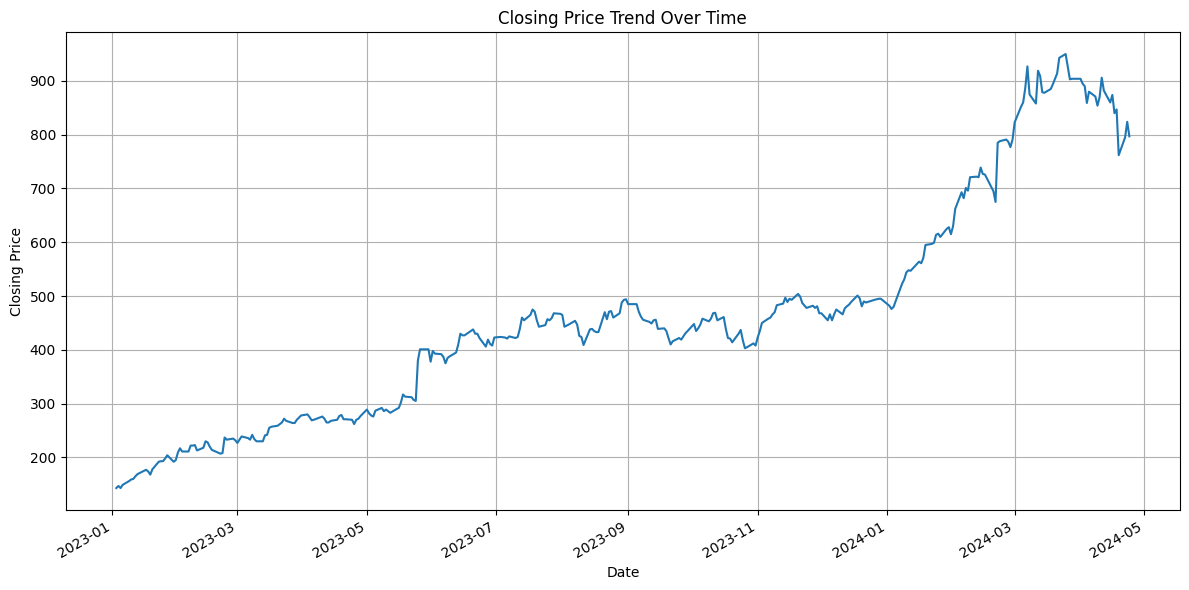

In [ ]:
# Plot the closing price trend over time
plt.figure(figsize=(12, 6))
df.set_index('Date')['Close'].plot()
plt.title('Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('closing_price_trend.png')
plt.show()

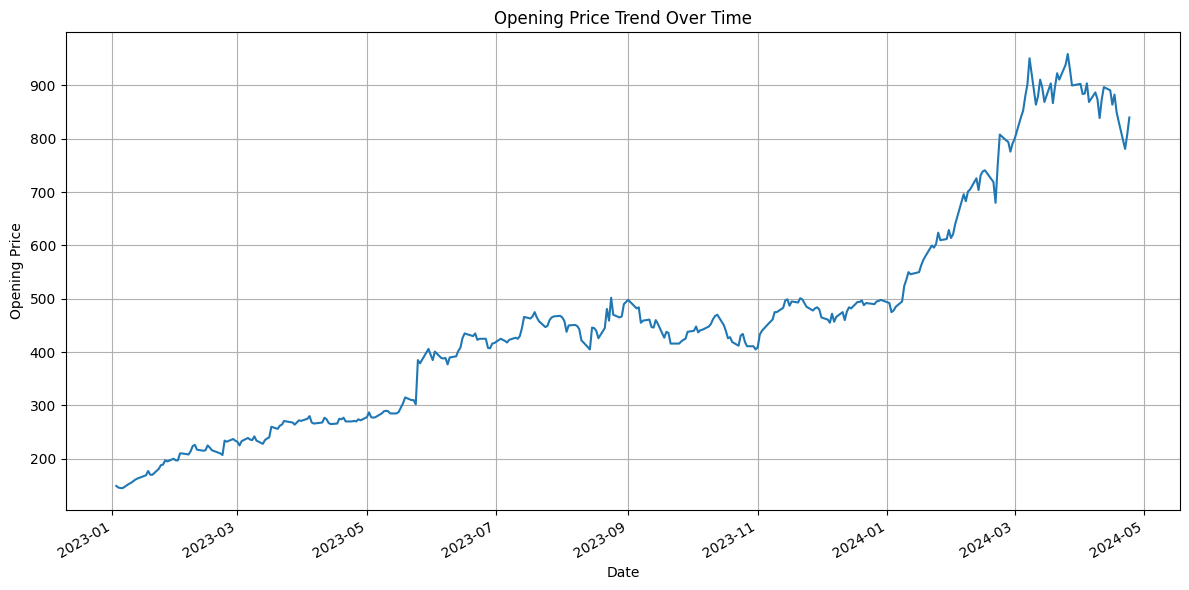

In [ ]:
# Plot the closing price trend over time
plt.figure(figsize=(12, 6))
df.set_index('Date')['Open'].plot()
plt.title('Opening Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('closing_price_trend.png')
plt.show()

In [ ]:
print("\nOverall performance metrics:")
print(f"Total Trading Days: {len(df)}")
print(f"Average Daily Range: {df['Daily_Range'].mean():.2f}")
print(f"Average Daily Return: {df['Daily_Return'].mean():.4f}")
print(f"Best Day: {df.loc[df['Daily_Return'].idxmax(), 'Date'].strftime('%Y-%m-%d')} (Return: {df['Daily_Return'].max():.4f})")
print(f"Worst Day: {df.loc[df['Daily_Return'].idxmin(), 'Date'].strftime('%Y-%m-%d')} (Return: {df['Daily_Return'].min():.4f})")
# Volatility
volatility = df['Daily_Return'].std() * np.sqrt(252)  # Annualized volatility
print(f"\nAnnualized Volatility: {volatility:.4f}")


Overall performance metrics:
Total Trading Days: 329
Average Daily Range: 16.18
Average Daily Return: 0.0025
Best Day: 2023-08-14 (Return: 0.0815)
Worst Day: 2024-04-19 (Return: -0.0841)

Annualized Volatility: 0.3711


This code analyzes stock market data for NVDA (likely NVIDIA Corporation) and performs the following:

Loads data from a CSV file named 'NVDA002.csv'.
Cleans the data, handling missing values and converting data types.
Calculates daily range and daily returns.
Identifies days with high returns (over 5%).
Creates visualizations of closing and opening price trends over time.
Calculates overall performance metrics such as total trading days, average daily range, average daily return, best and worst days, and annualized volatility.